In [11]:
from matplotlib import pyplot as plt
import pymongo
import numpy as np
from scipy import fftpack


myclient = pymongo.MongoClient('10.1.11.14:27017')
mydb = myclient["aiops"]
mycol = mydb["item"]

id=87
myquery = {"itemId": id, "recordTime": {'$gte': '2019-08-06 16:00:00', '$lt': '2019-08-06 20:00:00'}}
query_data1 = mycol.find(myquery, {"value": 1}).sort('recordTime')

data = []
for x in query_data1:
    data.append(float(x.get('value')))
print('数据采集完成--{}'.format(id))
data=np.array(data)




数据采集完成--87


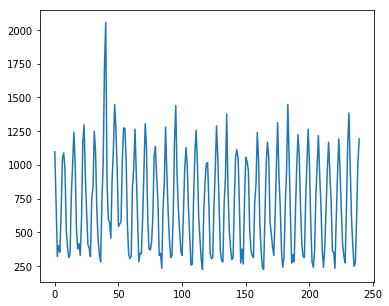

In [12]:

 # the random number generator
%matplotlib inline
np.random.seed(1234)

time_step = 1
period = 5.

time_vec = list(range(len(data)))


plt.figure(figsize=(6, 5))
plt.plot(time_vec, data, label='Original signal')


[]

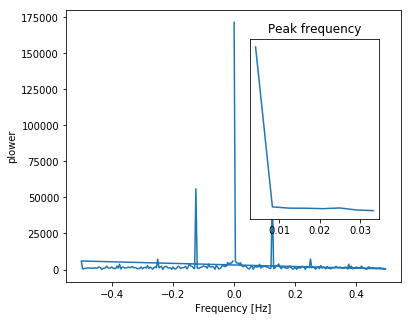

In [13]:
# The FFT of the signal
sig_fft = fftpack.fft(data)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(data.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

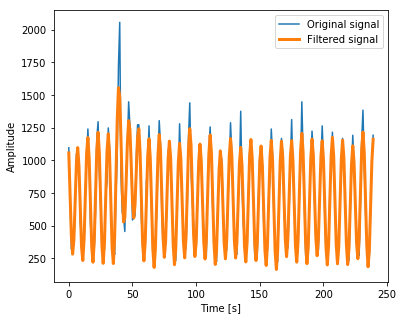

In [14]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, data, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')
